In [119]:
import traci
import matplotlib.pyplot as plt
import json


In [19]:
sumoBinary = "sumo"
sumoCmd = [sumoBinary, "-c", "simulacao.sumocfg"]

## Simulação com tempo fixado

In [127]:
def simulation(traffic_light_duration):
    try:
        traci.close()
    except:
        pass

    print('Starting simulation...')
    print('Traffic Light Duration:', traffic_light_duration, 'seconds')

    vehicles_list = []
    traci.start(sumoCmd)

    simulation_data = {
        'traffic_light_duration': traffic_light_duration,
        'traffic_lights': [],
        'data': [],
        'stats': {
            'step': []
        }
    }

    traffic_lights = traci.trafficlight.getIDList()

    for traffic_light in traffic_lights:

        traci.trafficlight.setProgramLogic(traffic_light, traci.trafficlight.Logic(
            programID='0',
            type=0,
            currentPhaseIndex=0,
            phases=[
                traci.trafficlight.Phase(traffic_light_duration, "GGGGGrrrrr"),
                traci.trafficlight.Phase(3, "yyyyyrrrrr"),
                traci.trafficlight.Phase(traffic_light_duration, "rrrrrGGGGG"),
                traci.trafficlight.Phase(3, "rrrrryyyyy"),
            ]
        ))

        traffic_light_data = {
            'id': traffic_light,
            'controlled_edges': [],
        }

        traffic_light_controlled_lanes = traci.trafficlight.getControlledLanes(
            traffic_light)

        traffic_light_data['controlled_lanes'] = list(
            traffic_light_controlled_lanes)

        controlled_lanes = []

        for traffic_light_controlled_lane in traffic_light_controlled_lanes:
            controlled_lanes.append(traffic_light_controlled_lane.split('_')[0])

        controlled_edges = list(set(controlled_lanes))

        for controlled_edge in controlled_edges:
            edge_data = {
                'id': controlled_edge,
                'lanes': traci.edge.getLaneNumber(controlled_edge),
            }

            traffic_light_data['controlled_edges'].append(edge_data)

        simulation_data['traffic_lights'].append(traffic_light_data)

    for step in range(24 * 3600):

        if step % 3600 == 0:
            print('Hour:', step / 3600, 'Step: {}'.format(step))

        if step == 0 * 3600:
            traci.simulation.setScale(0.6)
        elif step == 1 * 3600 or step == 2 * 3600:
            traci.simulation.setScale(0.5)
        elif step == 3 * 3600 or step == 4 * 3600:
            traci.simulation.setScale(0.4)
        elif step == 5 * 3600:
            traci.simulation.setScale(0.5)
        elif step == 6 * 3600:
            traci.simulation.setScale(0.8)
        elif step == 7 * 3600:
            traci.simulation.setScale(1.0)
        elif step == 8 * 3600:
            traci.simulation.setScale(3)
        elif step == 9 * 3600:
            traci.simulation.setScale(3.2)
        elif step == 10 * 3600:
            traci.simulation.setScale(2.8)
        elif step == 11 * 3600:
            traci.simulation.setScale(2.1)
        elif step == 12 * 3600:
            traci.simulation.setScale(2)
        elif step == 13 * 3600:
            traci.simulation.setScale(1.8)
        elif step == 14 * 3600:
            traci.simulation.setScale(1.3)
        elif step == 15 * 3600:
            traci.simulation.setScale(1.4)
        elif step == 16 * 3600:
            traci.simulation.setScale(1.8)
        elif step == 17 * 3600:
            traci.simulation.setScale(2.6)
        elif step == 18 * 3600:
            traci.simulation.setScale(2.9)
        elif step == 19 * 3600:
            traci.simulation.setScale(3.5)
        elif step == 20 * 3600:
            traci.simulation.setScale(2.7)
        elif step == 21 * 3600:
            traci.simulation.setScale(2)
        elif step == 22 * 3600:
            traci.simulation.setScale(1.3)
        elif step == 23 * 3600:
            traci.simulation.setScale(0.9)

        vehicles = traci.vehicle.getIDList()
        vehicles_list.extend(vehicles)

        simulation_data['stats']['step'].append({
            'step': step,
            'vehicles': len(vehicles),
        })

        traci.simulationStep()

        step_info = {
            'step': step,
            'traffic_lights': [],
        }

        for traffic_light in simulation_data['traffic_lights']:

            traffic_light_info = {
                'id': traffic_light['id'],
                'controlled_edges': [],
            }

            for controlled_edge in traffic_light['controlled_edges']:
                waiting_time = traci.edge.getWaitingTime(controlled_edge['id'])
                waiting_vehicle_count = traci.edge.getLastStepHaltingNumber(
                    controlled_edge['id'])

                edge_info = {
                    'id': controlled_edge['id'],
                    'waiting_time': waiting_time,
                    'waiting_vehicle_count': waiting_vehicle_count,
                    'avg_queue_length': round(waiting_vehicle_count / controlled_edge['lanes'], 2),
                }

                traffic_light_info['controlled_edges'].append(edge_info)

            step_info['traffic_lights'].append(traffic_light_info)

        simulation_data['data'].append(step_info)

    traci.close()

    simulation_data['stats']['vehicles_count'] = len(list(set(vehicles_list)))
    return simulation_data

In [128]:
# test
simulation_data = simulation(traffic_light_duration=42)

Starting simulation...
Traffic Light Duration: 42 seconds
Hour: 0.0 Step: 0
Hour: 1.0 Step: 3600
Hour: 2.0 Step: 7200
Hour: 3.0 Step: 10800
Hour: 4.0 Step: 14400
Hour: 5.0 Step: 18000
Hour: 6.0 Step: 21600
Hour: 7.0 Step: 25200
Hour: 8.0 Step: 28800
Hour: 9.0 Step: 32400
Hour: 10.0 Step: 36000
Hour: 11.0 Step: 39600
Hour: 12.0 Step: 43200
Hour: 13.0 Step: 46800
Hour: 14.0 Step: 50400
Hour: 15.0 Step: 54000
Hour: 16.0 Step: 57600
Hour: 17.0 Step: 61200
Hour: 18.0 Step: 64800
Hour: 19.0 Step: 68400
Hour: 20.0 Step: 72000
Hour: 21.0 Step: 75600
Hour: 22.0 Step: 79200
Hour: 23.0 Step: 82800


In [ ]:
# generate simulation data
for duration in range(15, 121):
    simulation_data = simulation(traffic_light_duration=duration)
    with open('arquivos/fixedTime_'+str(duration)+'.json', 'w') as outfile:
        outfile.write(json.dumps(simulation_data))


In [ ]:
with open('arquivos/simulacao_teste.json') as json_file:
    data = json.load(json_file)
    print(data)

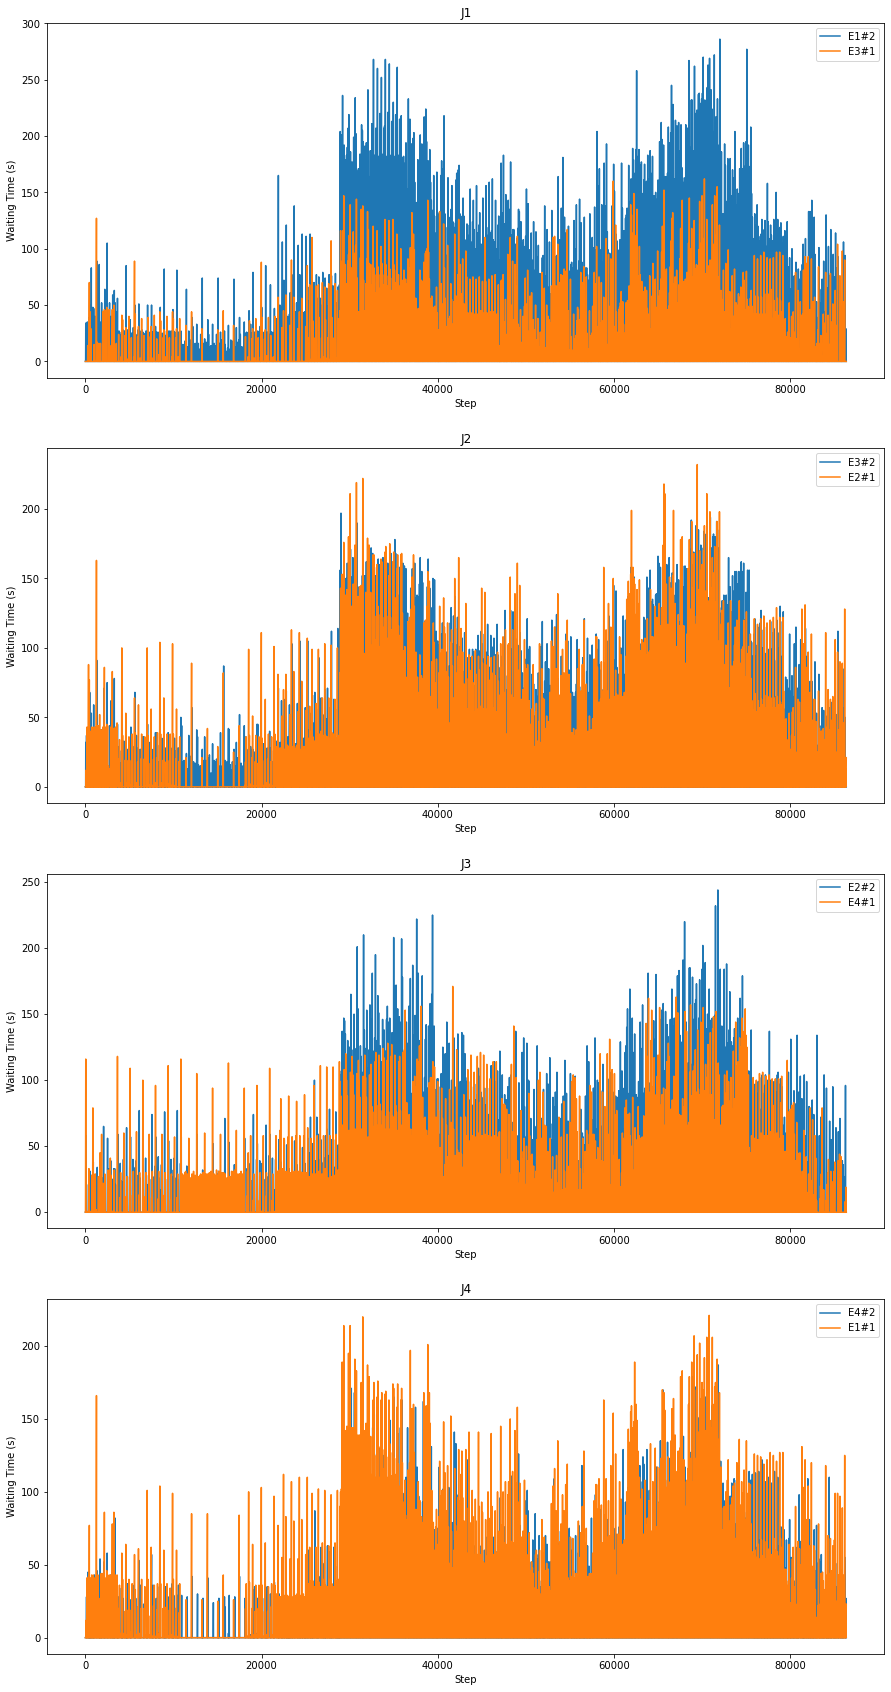

In [129]:
# Total Waiting Time By Traffic Light

plt.figure(figsize=(15, 30))

steps = [_['step'] for _ in simulation_data['data']]

traffic_lights_count = len(simulation_data['traffic_lights'])

for idx, traffic_light in enumerate(simulation_data['traffic_lights']):

    plt.subplot(traffic_lights_count, 1, idx + 1)
    plt.title(traffic_light['id'])
    plt.xlabel('Step')
    plt.ylabel('Waiting Time (s)')

    traffic_light_data = {}

    for edge in traffic_light['controlled_edges']:
        traffic_light_data[edge['id']] = []

    for step in simulation_data['data']:
        for step_traffic_light in step['traffic_lights']:
            if step_traffic_light['id'] == traffic_light['id']:
                for controlled_edge in step_traffic_light['controlled_edges']:
                    traffic_light_data[controlled_edge['id']].append(
                        controlled_edge['waiting_time'])
    
    for edge in traffic_light['controlled_edges']:
        plt.plot(steps, traffic_light_data[edge['id']], label=edge['id'])
    plt.legend()

plt.show()


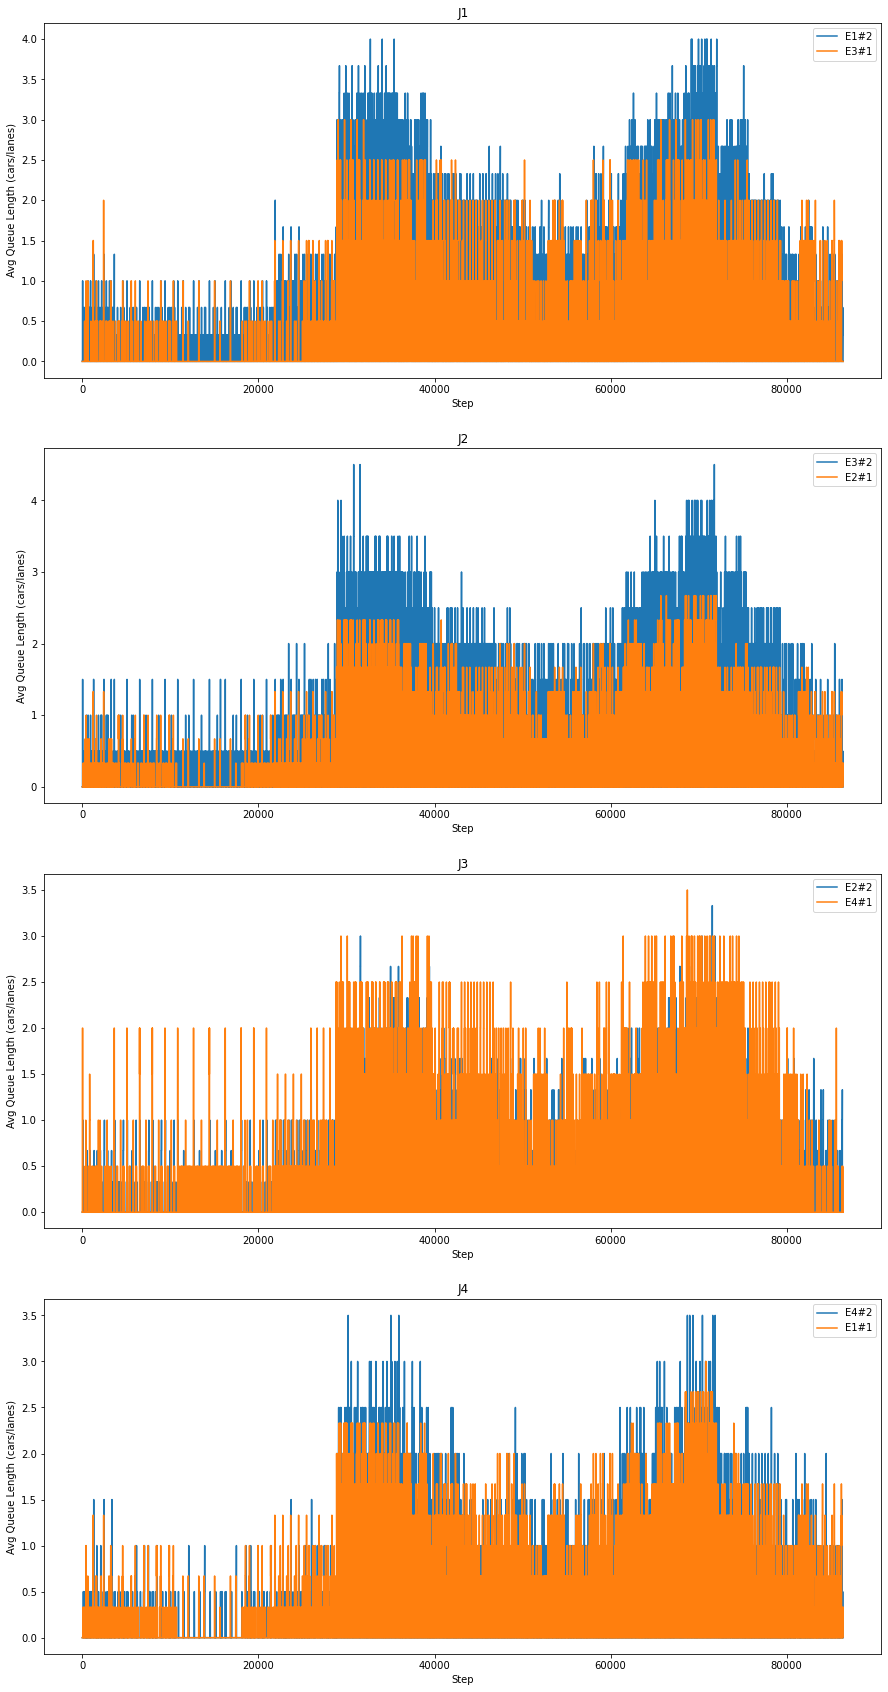

In [130]:
# Avg Queue Length By Traffic Light

plt.figure(figsize=(15, 30))

steps = [_['step'] for _ in simulation_data['data']]

traffic_lights_count = len(simulation_data['traffic_lights'])

for idx, traffic_light in enumerate(simulation_data['traffic_lights']):

    plt.subplot(traffic_lights_count, 1, idx + 1)
    plt.title(traffic_light['id'])
    plt.xlabel('Step')
    plt.ylabel('Avg Queue Length (cars/lanes)')

    traffic_light_data = {}

    for edge in traffic_light['controlled_edges']:
        traffic_light_data[edge['id']] = []

    for step in simulation_data['data']:
        for step_traffic_light in step['traffic_lights']:
            if step_traffic_light['id'] == traffic_light['id']:
                for controlled_edge in step_traffic_light['controlled_edges']:
                    traffic_light_data[controlled_edge['id']].append(
                        controlled_edge['avg_queue_length'])

    for edge in traffic_light['controlled_edges']:
        plt.plot(steps, traffic_light_data[edge['id']], label=edge['id'])
    plt.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


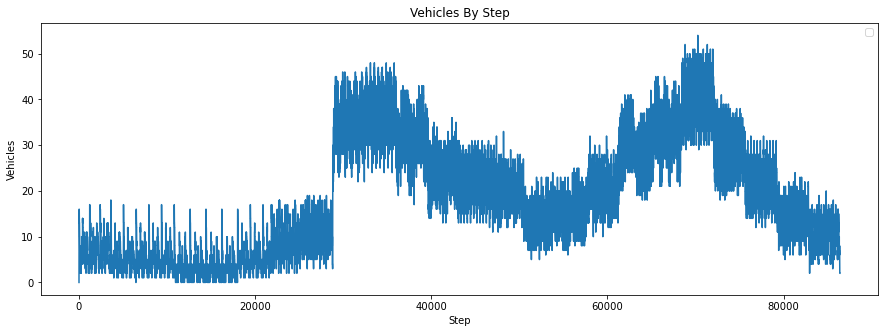

In [131]:
# Vehicles By Step

plt.figure(figsize=(15, 5))

steps = [_['step'] for _ in simulation_data['stats']['step']]
vehicles = [_['vehicles'] for _ in simulation_data['stats']['step']]

plt.title('Vehicles By Step')
plt.xlabel('Step')
plt.ylabel('Vehicles')

plt.plot(steps, vehicles)
plt.legend()

plt.show()


## Teste

In [97]:
try:
    traci.close()
except:
    pass

traci.start(sumoCmd)
traci.simulationStep()

print(traffic_lights)


for traffic_light in traffic_lights:

    traci.trafficlight.setProgramLogic(traffic_light, traci.trafficlight.Logic(
        programID='0',
        type=0,
        currentPhaseIndex=0,
        phases=[
            traci.trafficlight.Phase(120, "GGGGGrrrrr"),
            traci.trafficlight.Phase(3, "yyyyyrrrrr"),
            traci.trafficlight.Phase(120, "rrrrrGGGGG"),
            traci.trafficlight.Phase(3, "rrrrryyyyy"),
        ]
    ))

    print('traffic_light', traffic_light,
          traci.trafficlight.getControlledLanes(traffic_light))
    program = traci.trafficlight.getProgram(traffic_light)
    print('program', traffic_light,
          program)
    print('program_desc', program,
          traci.trafficlight.getCompleteRedYellowGreenDefinition(traffic_light))

# vehicles_list = []

# for step in range(3600):
#       traci.simulationStep()
#       vehicles = traci.vehicle.getIDList()
#       vehicles_list = []
#       vehicles_list.extend(vehicles)

#       print(step, len(vehicles_list))
#       print(vehicles_list)

traci.close()


('J1', 'J2', 'J3', 'J4')
traffic_light J1 ('E3#1_0', 'E3#1_0', 'E3#1_1', 'E1#2_0', 'E1#2_1', 'E1#2_2', 'E1#2_2')
program J1 0
program_desc 0 (Logic(programID='0', type=0, currentPhaseIndex=0, phases=(Phase(duration=120.0, state='GGGGGrrrrr', minDur=-1.0, maxDur=-1.0, next=()), Phase(duration=3.0, state='yyyyyrrrrr', minDur=-1.0, maxDur=-1.0, next=()), Phase(duration=120.0, state='rrrrrGGGGG', minDur=-1.0, maxDur=-1.0, next=()), Phase(duration=3.0, state='rrrrryyyyy', minDur=-1.0, maxDur=-1.0, next=())), subParameter={}),)
traffic_light J2 ('E2#1_0', 'E2#1_0', 'E2#1_1', 'E2#1_2', 'E3#2_0', 'E3#2_1', 'E3#2_1')
program J2 0
program_desc 0 (Logic(programID='0', type=0, currentPhaseIndex=0, phases=(Phase(duration=120.0, state='GGGGGrrrrr', minDur=-1.0, maxDur=-1.0, next=()), Phase(duration=3.0, state='yyyyyrrrrr', minDur=-1.0, maxDur=-1.0, next=()), Phase(duration=120.0, state='rrrrrGGGGG', minDur=-1.0, maxDur=-1.0, next=()), Phase(duration=3.0, state='rrrrryyyyy', minDur=-1.0, maxDur=-1.0,

C:\Users\me\AppData\Local\Temp\ipykernel_6708\1569871986.py:32: UserWarning: Call to deprecated function getCompleteRedYellowGreenDefinition, use getAllProgramLogics instead.
  traci.trafficlight.getCompleteRedYellowGreenDefinition(traffic_light))
